In [32]:
import tensorflow as tf
import numpy as np
import os
import cv2

In [33]:
PATH = "D:\\Projects\\AI\\ML\\Image Recognition\\GenderClassification\\Training"
PATHT ="D:\\Projects\\AI\\ML\\Image Recognition\\GenderClassification\\Validation"

In [34]:
def loadFolderImages(folder):
    images = []
    for filename in os.listdir(folder):
        try:
            img = cv2.imread(os.path.join(folder,filename))
            # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            if img is not None:
                images.append(img)
        except:
            None
    return images

In [35]:
male = PATH+"\\male"
female = PATH+"\\female"
malet = PATHT+"\\male"
femalet = PATHT+"\\female"

In [36]:
male = loadFolderImages(male)
female = loadFolderImages(female)
malet = loadFolderImages(malet)
femalet = loadFolderImages(femalet)

In [37]:
def resize_images(imgs):
    resized_images = []
    for img in imgs:
        resized_img = cv2.resize(img, (70, 90))  
        resized_images.append(resized_img)
    return resized_images

# Resize male and female
male = resize_images(male)
female = resize_images(female)
malet = resize_images(malet)
femalet = resize_images(femalet)

In [38]:
male = np.array(male)
female = np.array(female)
malet = np.array(malet)
femalet = np.array(femalet)

# Normalize images
male = male / 255.0
female = female / 255.0
malet = malet / 255.0
femalet = femalet / 255.0

In [39]:
# Create labels for the images: 0 for male, 1 for female
male_labels = np.zeros(male.shape[0])
female_labels = np.ones(female.shape[0])
malet_labels = np.zeros(malet.shape[0])
femalet_labels = np.ones(femalet.shape[0])

# Concatenate cats and dogs images and labels
X_train = np.concatenate((male, female), axis=0)
y_train = np.concatenate((male_labels, female_labels), axis=0)
X_test = np.concatenate((malet, femalet), axis=0)
y_test = np.concatenate((malet_labels, femalet_labels), axis=0)

In [40]:
X_train.shape

(47009, 90, 70, 3)

In [41]:
from keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator object
datagen = ImageDataGenerator(
    rotation_range=20,     # Range (0-180) within which to randomly rotate pictures
    width_shift_range=0.2, # Fraction of total width to randomly translate images
    height_shift_range=0.2,# Fraction of total height to randomly translate images
    zoom_range=0.2,        # Range for random zoom
    horizontal_flip=True,  # Randomly flip inputs horizontally
    vertical_flip=True)    # Randomly flip inputs vertically

# Fit the ImageDataGenerator object to your data
datagen.fit(X_train)

In [45]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(90, 70, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Use 'sigmoid' for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [46]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=len(X_train) / 32, validation_data = (X_test, y_test) , epochs=8)

Epoch 1/8
1469/1469 [==============================] - 86s 58ms/step - loss: 0.5706 - accuracy: 0.7062 - val_loss: 0.3926 - val_accuracy: 0.8306
Epoch 2/8
1469/1469 [==============================] - 86s 58ms/step - loss: 0.4589 - accuracy: 0.7898 - val_loss: 0.3027 - val_accuracy: 0.8760
Epoch 3/8
1469/1469 [==============================] - 87s 59ms/step - loss: 0.3643 - accuracy: 0.8438 - val_loss: 0.2497 - val_accuracy: 0.8990
Epoch 4/8
1469/1469 [==============================] - 87s 59ms/step - loss: 0.3126 - accuracy: 0.8689 - val_loss: 0.2454 - val_accuracy: 0.9027
Epoch 5/8
1469/1469 [==============================] - 87s 60ms/step - loss: 0.2835 - accuracy: 0.8842 - val_loss: 0.2225 - val_accuracy: 0.9123
Epoch 6/8
1469/1469 [==============================] - 85s 58ms/step - loss: 0.2639 - accuracy: 0.8933 - val_loss: 0.1718 - val_accuracy: 0.9353
Epoch 7/8
1469/1469 [==============================] - 84s 57ms/step - loss: 0.2509 - accuracy: 0.9004 - val_loss: 0.1807 - val_ac

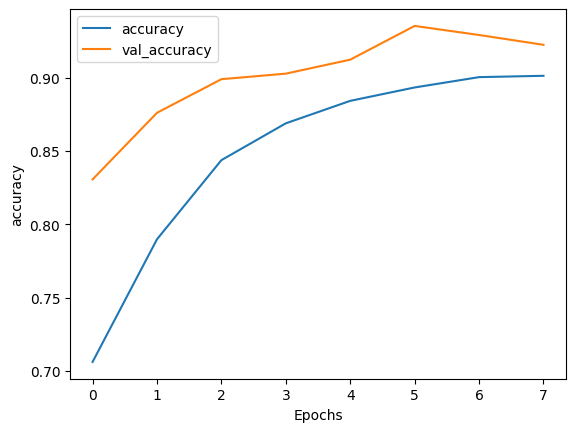

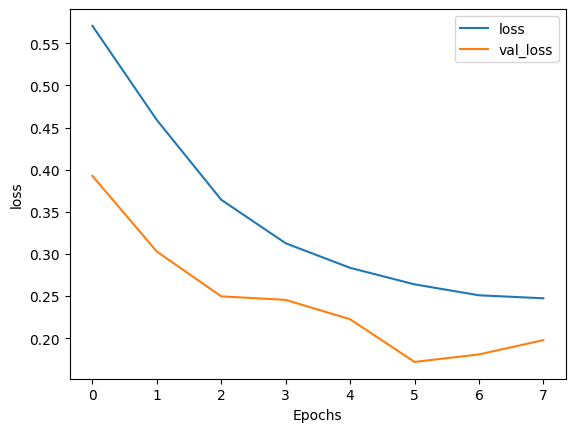

In [47]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [48]:
history.history

{'loss': [0.5706140995025635,
  0.45888373255729675,
  0.36425575613975525,
  0.31262916326522827,
  0.28348299860954285,
  0.26388809084892273,
  0.2509080469608307,
  0.24734577536582947],
 'accuracy': [0.7062051892280579,
  0.7898274660110474,
  0.8437746167182922,
  0.8688761591911316,
  0.8841924071311951,
  0.8933182954788208,
  0.9003595113754272,
  0.9012742042541504],
 'val_loss': [0.3926134705543518,
  0.3027306795120239,
  0.24965448677539825,
  0.24543146789073944,
  0.22247537970542908,
  0.17182332277297974,
  0.18073289096355438,
  0.19765517115592957],
 'val_accuracy': [0.8306292295455933,
  0.8760408759117126,
  0.8989613056182861,
  0.9027384519577026,
  0.9122671484947205,
  0.9352734088897705,
  0.9290926456451416,
  0.9223967790603638]}

In [49]:
model.save("gender-classifier.h5")

C:\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [50]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 88, 68, 32)        896       
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 44, 34, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 42, 32, 64)        18496     
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 21, 16, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_11 (Flatten)        (None, 21504)             0         
                                                                 
 dense_22 (Dense)            (None, 64)              